# Importing the data and Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

data=pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Observing the data and checking out null values

In [35]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Encoding Categorical Variables.

In [36]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert 'Yes'/'No' to 1/0
data[binary_cols] = data[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))
data['furnishingstatus'] = data['furnishingstatus'].astype(str)

data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)
data['furnishingstatus_semi-furnished'] = data['furnishingstatus_semi-furnished'].astype(int)
data['furnishingstatus_unfurnished'] = data['furnishingstatus_unfurnished'].astype(int)

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [37]:
num_cols=['price','area','bedrooms','bathrooms','stories','parking']
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3- Q1
    minimum_range = Q1 - 1.5* IQR
    maximum_range = Q3 + 1.5* IQR

    outliers = ((data[col] < minimum_range) | (data[col] > maximum_range))
    print(f'The Number of outliers in {col} is {outliers.sum()}')

The Number of outliers in price is 15
The Number of outliers in area is 12
The Number of outliers in bedrooms is 12
The Number of outliers in bathrooms is 1
The Number of outliers in stories is 41
The Number of outliers in parking is 12


# Removing outliers

In [38]:
for col in num_cols:
    if(col=="Age"):
        continue
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3- Q1
    minimum_range = Q1 - 1.5* IQR
    maximum_range = Q3 + 1.5* IQR

    outliers = ((data[col] < minimum_range) | (data[col] > maximum_range))
    median_val=data[col].median()
    data.loc[outliers,col]=median_val

In [39]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3- Q1
    minimum_range = Q1 - 1.5* IQR
    maximum_range = Q3 + 1.5* IQR

    outliers = ((data[col] < minimum_range) | (data[col] > maximum_range))
    print(f'The Number of outliers in {col} is {outliers.sum()}')

The Number of outliers in price is 5
The Number of outliers in area is 6
The Number of outliers in bedrooms is 0
The Number of outliers in bathrooms is 0
The Number of outliers in stories is 0
The Number of outliers in parking is 0


# Standardizing the Data

In [40]:
X = data.drop('price', axis=1)
y = data['price']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.33470625,  1.64762051,  1.47243614, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 2.17446697,  1.64762051, -0.57470084, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.71976613,  0.12566597,  1.47243614, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.73743057, -1.39628857, -0.57470084, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.12459298,  0.12566597, -0.57470084, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.61201177,  0.12566597, -0.57470084, ..., -0.55403469,
        -0.84488844,  1.43589615]])

# Simple Linear Regression

In [41]:
X_area = X_scaled[:, [0]]
X_train,X_test,y_train,y_test=train_test_split(X_area,y,test_size=0.4,random_state=42)

simple_lr=LinearRegression()
simple_lr.fit(X_train,y_train)
y_pred=simple_lr.predict(X_test)

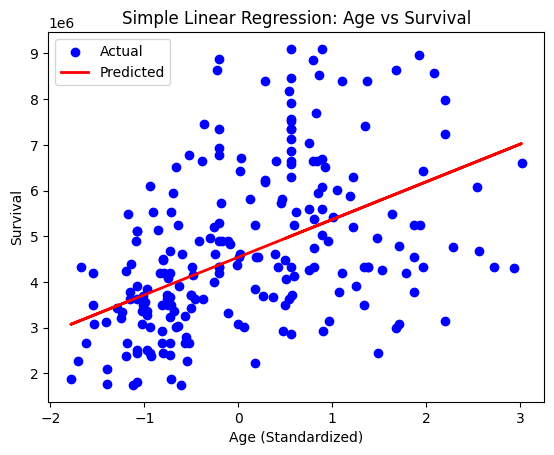

In [42]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: Age vs Survival')
plt.xlabel('Age (Standardized)')
plt.ylabel('Survival')
plt.legend()
plt.show()

# Evaluating Simple Linear Regression Model

In [50]:
print("Simple Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("--"*50)
print("Simple Linear Regression Coefficients:")
print(f"Intercept (beta0): {simple_lr.intercept_:.2f}")
print(f"Coefficient for Area (beta1): {simple_lr.coef_[0]:.2f}")
print(f"Interpretation: For every one unit increase in Area, price changes by {simple_lr.coef_[0]:.2f} units on average.\n")


Simple Linear Regression:
MSE: 1528665340589.495
R² Score: 0.5050740088861057
MAE: 941172.2374771642
----------------------------------------------------------------------------------------------------
Simple Linear Regression Coefficients:
Intercept (beta0): 4591491.25
Coefficient for Area (beta1): 488698.02
Interpretation: For every one unit increase in Area, price changes by 488698.02 units on average.



# Multiple Linear Regression

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.4,random_state=42)

multi_lr=LinearRegression()
multi_lr.fit(X_train,y_train)
y_pred=multi_lr.predict(X_test)

# Evaluating Multiple Linear Regression Model

In [51]:
print("Multiple Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("--"*50)
print("Multiple Linear Regression Coefficients:")
print(f"Intercept (beta0): {multi_lr.intercept_:.2f}")

for feature, coef in zip(X.columns,multi_lr.coef_):
    print(f"Coefficient for {feature} (beta): {coef:.2f}")
    print(f"Interpretation: Holding other features constant, a one unit increase in {feature} changes price by {coef:.2f} units.\n")

Multiple Linear Regression:
MSE: 1528665340589.495
R² Score: 0.5050740088861057
MAE: 941172.2374771642
----------------------------------------------------------------------------------------------------
Multiple Linear Regression Coefficients:
Intercept (beta0): 4591491.25
Coefficient for area (beta): 488698.02
Interpretation: Holding other features constant, a one unit increase in area changes price by 488698.02 units.

Coefficient for bedrooms (beta): 10446.03
Interpretation: Holding other features constant, a one unit increase in bedrooms changes price by 10446.03 units.

Coefficient for bathrooms (beta): 395335.14
Interpretation: Holding other features constant, a one unit increase in bathrooms changes price by 395335.14 units.

Coefficient for stories (beta): 142420.57
Interpretation: Holding other features constant, a one unit increase in stories changes price by 142420.57 units.

Coefficient for mainroad (beta): 146731.45
Interpretation: Holding other features constant, a one u